## Homework#1
#### Farheen Latif
#### 20L-1363
#### BDS-8A


In [1]:
#!pip install opencv-python
#!pip install matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

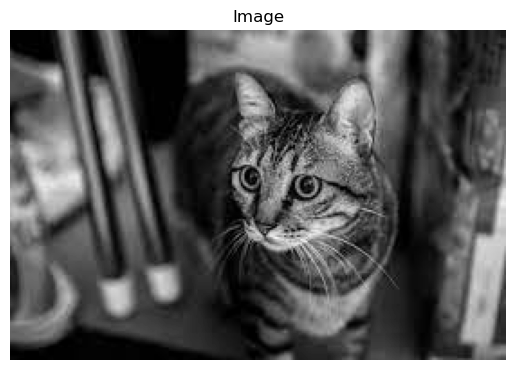

In [3]:
image = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)
# Use matplotlib to display the image
plt.imshow(image, cmap='gray')
plt.title("Image")
plt.axis('off')  # Hide the axis
plt.show()

## Edge Detection

Image Matrix:
 [[ 1  1  1 ... 19 19 19]
 [ 1  1  1 ... 24 24 24]
 [ 1  1  1 ... 25 25 25]
 ...
 [ 2  2  2 ... 92 92 92]
 [ 6  6  5 ... 74 74 74]
 [ 6  6  5 ... 65 65 65]]


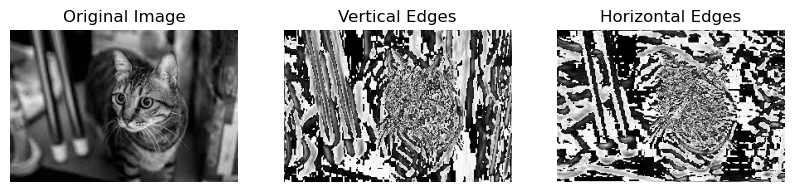

In [4]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel
    output = np.zeros_like(image)  # Prepare the output array
    image_padded = np.pad(image, ((1, 1), (1, 1)), 'constant', constant_values=0)  # Pad with zeros

    for x in range(image.shape[1]):  # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # Perform convolution
            output[y, x] = (kernel * image_padded[y:y+3, x:x+3]).sum()
    return output

# Load the image in grayscale
image = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)
print("Image Matrix:\n", image)

# Define the vertical and horizontal edge detection filters
vertical_filter = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
horizontal_filter = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply the filters using convolution
vertical_edges = convolve2d(image, vertical_filter)
horizontal_edges = convolve2d(image, horizontal_filter)

# Display the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.show()

## Padding

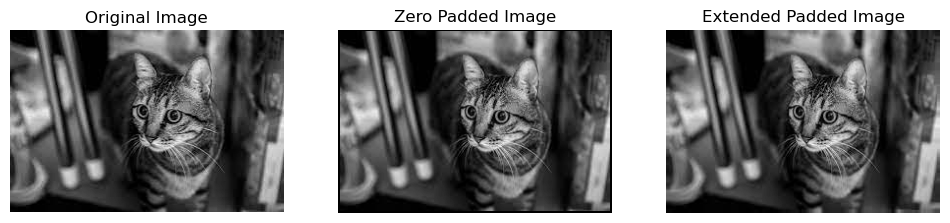

In [5]:
def add_zero_padding(image, pad_width=1):
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    return padded_image

def add_extended_padding(image, pad_width=1):
    padded_image = np.pad(image, pad_width, mode='edge')
    return padded_image

# Add zero padding
zero_padded_image = add_zero_padding(image, pad_width=2)
# Add extended padding
extended_padded_image = add_extended_padding(image, pad_width=2)

# Display images using matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis for better visualization

plt.subplot(1, 3, 2)
plt.imshow(zero_padded_image, cmap='gray')
plt.title('Zero Padded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(extended_padded_image, cmap='gray')
plt.title('Extended Padded Image')
plt.axis('off')

plt.show()


## Pooling

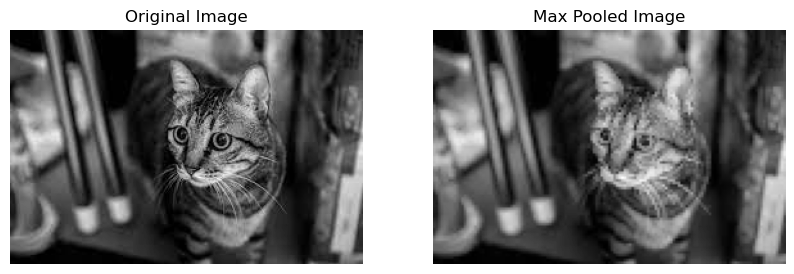

In [6]:
def max_pooling(image, kernel_size=2, stride=2):
    # Calculate the size of the output image
    out_height = (image.shape[0] - kernel_size) // stride + 1
    out_width = (image.shape[1] - kernel_size) // stride + 1
    pooled_image = np.zeros((out_height, out_width), dtype=np.float32)
    
    # Perform max pooling
    for i in range(0, image.shape[0] - kernel_size + 1, stride):
        for j in range(0, image.shape[1] - kernel_size + 1, stride):
            window = image[i:i+kernel_size, j:j+kernel_size]
            pooled_image[i//stride, j//stride] = np.max(window)
    
    return pooled_image


# Apply max pooling
pooled_image = max_pooling(image, kernel_size=2, stride=2)

# Display the original and pooled images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pooled_image, cmap='gray')
plt.title('Max Pooled Image')
plt.axis('off')

plt.show()

## Stride

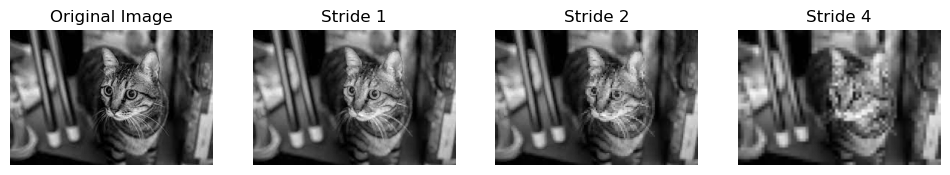

In [7]:
def max_pooling(image, kernel_size=2, stride=2):
    out_height = int((image.shape[0] - kernel_size) / stride + 1)
    out_width = int((image.shape[1] - kernel_size) / stride + 1)
    pooled_image = np.zeros((out_height, out_width), dtype=np.float32)
    
    for i in range(0, out_height):
        for j in range(0, out_width):
            start_i = i * stride
            start_j = j * stride
            end_i = start_i + kernel_size
            end_j = start_j + kernel_size
            pooled_image[i, j] = np.max(image[start_i:end_i, start_j:end_j])
    
    return pooled_image

# Try different strides
strides = [1, 2, 4]

# Create a figure for plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, len(strides) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, stride in enumerate(strides, start=2):
    pooled_image = max_pooling(image, kernel_size=2, stride=stride)
    plt.subplot(1, len(strides) + 1, i)
    plt.imshow(pooled_image, cmap='gray')
    plt.title(f'Stride {stride}')
    plt.axis('off')

plt.show()